<a href="https://colab.research.google.com/github/megumihoshino/ML-intermediate_new/blob/main/NN_3_manyclasspractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MEMBUAT DAN MELATIH MODEL UTK KLASIFIKASI BYK KELAS
'''
PRACTICE 2: MENGGUNAKAN DATASET IRIS UTK KLASIFIKASI
BUNGA IRIS.
ALGORITHM:
1. import library yg diperlukan
2. ubah dataset mjd dataframe
3. hapus kolom pd dataset yg tdk ada hubungannya dg label (dlm hal ini kolom id)
4. lakukan metode transformasi utk jenis data kategorikal
5. gabung kolom hasil one hot encoding dan buang kolom spesies
6. konversi dataframe jd numpy array
7. pisah atribut label dan label agr mudah dipelajari oleh model NN
  - menentukan variable dependen dan independen
8. normalisasi
9. bagi mjd data uji dan data latih
10.tentukan arsitektur model (gunakan softmax utk data kategorikal)
11.tentukan optimizer dan loss function dari model
 - utk case kateforikal pke categorical_crossentropy
12.fungsi fit tampung ke dlm objek hist (history)
13.menguji akurasi prediksi
'''

In [ ]:
#MULTICLASS NN MODEL PRACTICE

#Step 1
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt


In [ ]:
#Step 2
df = pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Step 3
df = df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Step 4a (experiment)
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [ ]:
#Step 4
category = pd.get_dummies(df.Species, dtype = int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
#Step 5
new_df = pd.concat([df, category], axis =1)
new_df = new_df.drop(columns = 'Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
#Step 6
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
#Step 7
'''
dlm kasus ini var independen mencakup SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
Lalu, utk variabel dependennya ialah Iris-setosa, Iris-versicolor, dan Iris-virginica.
'''
X= dataset[:,0:4] #4 kolom pertama var independen
y= dataset[:,4:7] #3 kolom terakhir dari 7 kolom sbg var dependen


In [ ]:
#Step 8
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
#Step 9
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size = 0.3 )

In [ ]:
#Step 10

model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Step 11
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer= RMSprop(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Step 11.1
#Memanggil fungsi optimasi Callbacks apabila nilai akurasi telah mencapai target
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.997):
      print("\n Akurasi telah mencapai >=98%!")
      self.model.stop_training = True
      print("\nTraining dihentikan!")
callbacks = myCallback()


In [ ]:
#Step 12
hist = model.fit(X_train, Y_train, epochs=100, callbacks = [callbacks])

'''
menampung fungsi fit pd sebuah objek history adalah spy kita dpt
membuat plot dari akurasi dan loss pd saat proses pelatihan.
'''

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0380 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.0288 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0404 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0377 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0222 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.0290 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0385 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9788 - loss: 0.0342 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9962 - loss: 0.0219 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.0406 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0291 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - los

'\nmenampung fungsi fit pd sebuah objek history adalah spy kita dpt\nmembuat plot dari akurasi dan loss pd saat proses pelatihan.\n'

In [ ]:
#Step 13

model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9525 - loss: 0.1285 


[0.10766082257032394, 0.9555555582046509]

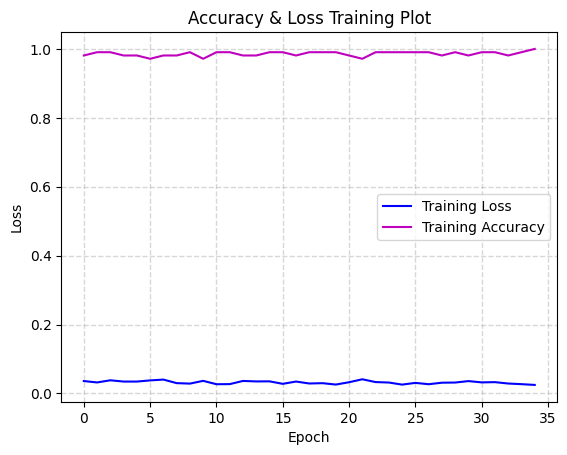

In [ ]:
plt.plot(hist.history['loss'], 'b', label = 'Training Loss')
plt.plot(hist.history['accuracy'], 'm', label = 'Training Accuracy')
plt.title('Accuracy & Loss Training Plot')
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = "center right")
plt.show()


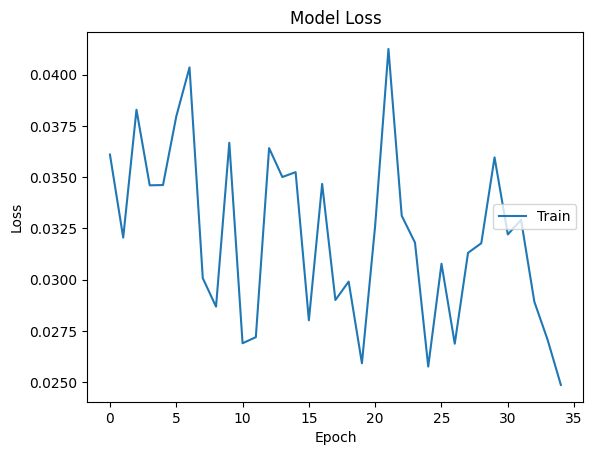

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'center right')
plt.show()

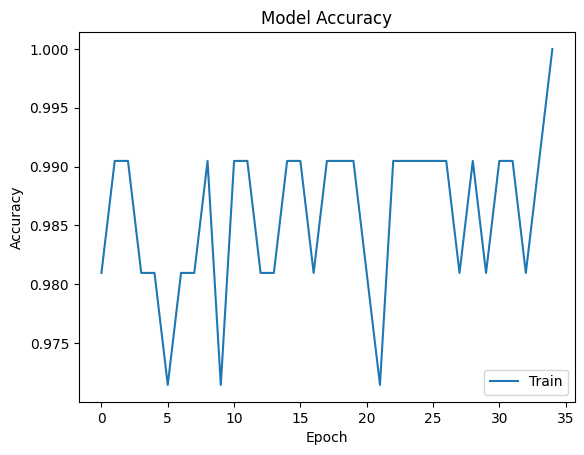

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'lower right')
plt.show()